In [1]:
import cv2 as cv,numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import ImageFont, ImageDraw, Image

def imshow(tit,image):
    plt.title(tit)
    if len(image.shape)==3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image,cmap='gray')
    plt.show()

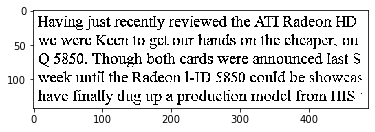

True

In [3]:
textimage = cv.imread('ocr-text.png',0)

text_blur = cv.GaussianBlur(textimage,(3,3),0)
binary = cv.adaptiveThreshold(textimage,255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,21,5)#21은 박스의 크기
imshow("",binary)
cv.imwrite('out.png',binary)

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
str = pytesseract.image_to_string('ocr-text.png')
print(str)

Having just recently reviewed the ATI Radeo
we were Keen to get our hands on the cheape
Q 5850. Though both cards were announced
week until the Radeon 1-ID 5850 could be she
have finally dug up a production model from


In [82]:
credit_data = ['credit1.jpg','credit2.jpg','credit3.jpg','credit4.jpg']
for i in range(len(credit_data)):
    str = pytesseract.image_to_string(credit_data[i])
    print(str)
    print('--------------')

NNO)

5412 1501 2345 0987
are)
SOT Sa ea
--------------
We

[NSS
Lt
ie

   

SY)
--------------
._ =

1234 5678 9O12 3456

cre)
Paai/Z:18)
iy
--------------
dU LOY ee

Tee) Weds sd eds

ne. CUTE

BoA psoas
--------------


**EDGE / CONTOUR**

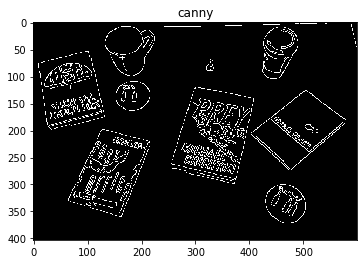

In [12]:
image = cv.imread("book.jpg")
image2 =image.copy()
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (3, 3), 0)
edged = cv.Canny(gray, 10, 250) #값 차이가 10 이하 250이상 일 경우 edge로 반환 10~250사이 값도 반환 가능(주변이 edge로 된 경우)
imshow('canny',edged)

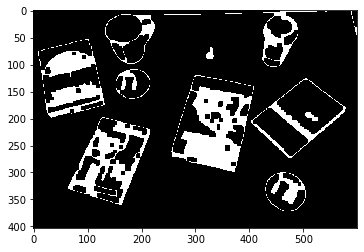

In [9]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
closed = cv.morphologyEx(edged, cv.MORPH_CLOSE, kernel)
imshow('',closed)

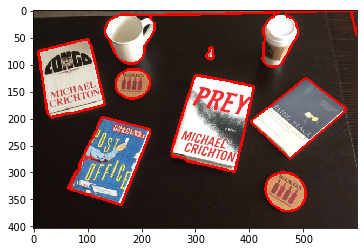

I found 4 books in that image


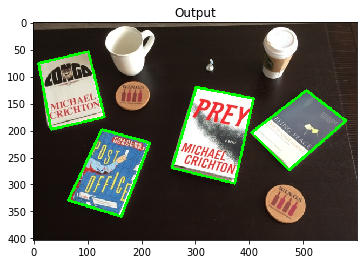

In [11]:
cnts, _ = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#
total = 0

cv.drawContours(image2, cnts,-1,(0,0,255),2)
imshow('',image2)
for c in cnts:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02 * peri, True) # 2% 일반적 값

    if len(approx) == 4:
        cv.drawContours(image, [approx], -1, (0, 255, 0), 4) # image에서 approx에 해당 하는 전체 contour를 초록색 굵기 4로 그려라. 
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [14]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, threshold = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [18]:
img = cv.imread('stone.png')

img = cv.medianBlur(img, 5)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT,
                          1, 20, param1=100, param2=30,
                          minRadius=10, maxRadius=50)
#image – 8-bit single-channel image. grayscale image.
# method – 검출 방법. 현재는 HOUGH_GRADIENT가 있음.
# dp – dp=1이면 Input Image와 동일한 해상도.
# minDist – 검출한 원의 중심과의 최소거리. 값이 작으면 원이 아닌 것들도 검출이 되고, 너무 크면 원을 놓칠 수 있음.
# param1 – 내부적으로 사용하는 canny edge 검출기에 전달되는 Parameter / 문턱값
# param2 – 이 값이 작을 수록 오류가 높아짐. 크면 검출률이 낮아짐.
# minRadius – 원의 최소 반지름.
# maxRadius – 원의 최대 반지름.

circles = np.uint16(np.around(circles))
print(circles)

[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]


[(255, 2124), (0, 1012)]
[(255, 1695), (0, 1669)]
[(255, 2166), (0, 970)]
[(255, 2362), (0, 1002)]
[(255, 2218), (0, 1146)]
[(255, 2121), (0, 1015)]
[(255, 2254), (0, 1110)]
[(0, 1740), (255, 1396)]
[(0, 1620), (255, 1516)]
[(255, 2366), (0, 998)]
[(0, 1764), (255, 1372)]
[(0, 1768), (255, 1596)]
[(0, 1752), (255, 1384)]
[(0, 1785), (255, 1351)]
[(255, 1962), (0, 954)]
[(255, 2270), (0, 1094)]
[(0, 1679), (255, 1457)]
[(0, 1781), (255, 1583)]


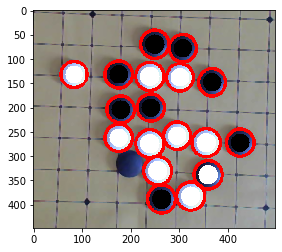

In [25]:
font = cv.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
#     cv.circle(img, (x, y),r, (0, 0, 255), 5)
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1) #image,(coordinates),radius,(BGR),thickness
    else :
        cv.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            
imshow('',img)

[(0, 3609), (255, 1867)]
[(0, 2208), (255, 496)]
[(255, 4062), (0, 2022)]
[(255, 1181), (0, 755)]
[(0, 638), (255, 262)]


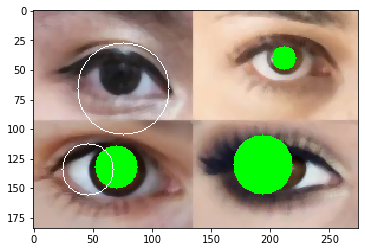

In [40]:
img2 = cv.imread('iris.jpg')

img2 = cv.medianBlur(img2, 5)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles2 = cv.HoughCircles(gray2, cv.HOUGH_GRADIENT,
                          1, 20, param1=100, param2=30,
                          minRadius=10, maxRadius=50)
#image – 8-bit single-channel image. grayscale image.
# method – 검출 방법. 현재는 HOUGH_GRADIENT가 있음.
# dp – dp=1이면 Input Image와 동일한 해상도.
# minDist – 검출한 원의 중심과의 최소거리. 값이 작으면 원이 아닌 것들도 검출이 되고, 너무 크면 원을 놓칠 수 있음.
# param1 – 내부적으로 사용하는 canny edge 검출기에 전달되는 Parameter / 문턱값
# param2 – 이 값이 작을 수록 오류가 높아짐. 크면 검출률이 낮아짐.
# minRadius – 원의 최소 반지름.
# maxRadius – 원의 최대 반지름.

circles2 = np.uint16(np.around(circles2))
font = cv.FONT_HERSHEY_SIMPLEX
for i in circles2[0, :]:
    x, y, r = i
#     cv.circle(img2, (x, y),r, (0, 0, 255), 5)
    crop_img2 = img2[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img2)
    
    if txt == 'black' :  
        cv.circle(img2, (i[0], i[1]),int(i[2]*0.7), (0, 255, 0), -1) #image,(coordinates),radius,(BGR),thickness
    else :
        cv.circle(img2, (i[0], i[1]), r, (255, 255, 255), 1)            
imshow('',img2)

In [33]:
print(img2.shape)
detect_weiqi(img2)

(112, 320, 3)
[(255, 35840)]


('white', array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [ ]:
def detect_weiqi(img):  
    txt = 'black'
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, threshold = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

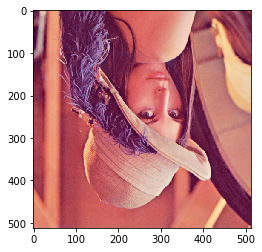

In [47]:
img = cv.imread('lena.jpg')
img2 = cv.flip(img,0) #1은 좌우 반전, 0은 상하 반전
imshow('',img2)

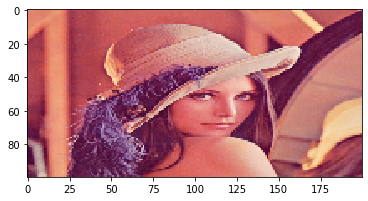

In [52]:
zoom1 = cv.resize(img,(200,100),interpolation=cv.INTER_CUBIC) # 일반적으로 / 보단 *로 표현한다.
imshow('',zoom1)

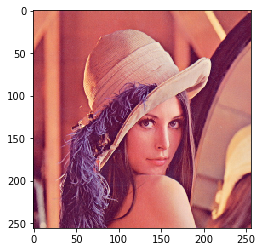

In [53]:
res = cv.resize(img,None,fx=0.5,fy=0.5,interpolation=cv.INTER_CUBIC) # 일반적으로 / 보단 *로 표현한다. 
#None 값은 내가 직접 사이즈를 지정하지않고 실수배로 지정할때 사용하는 방법
imshow('',res)

(200, 290, 3)


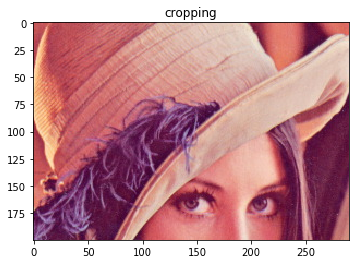

In [62]:
cropping = img[100:300,120:410]
print(cropping.shape)
imshow('cropping',cropping) #원본 자르기

**이미지 이동,회전 변환**


2*3 행렬 (1,1)~(2,2) 이동과 회전에 대한 내용 포함 /(1,3),(2,3)은 이미지 왼쪽 상단 기준이 0,0에서 얼마나 변했는지 알려주는 값

**이동**

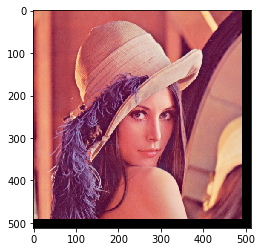

In [72]:
height, width = img.shape[:2]
M = np.float32([
    [1,0,-20], #10 은 x 축으로 이동할 양 (+)는 왼쪽에서 오른쪽
    [0,1,-20] #20 은 y 축으로 이동할 양 (+)는 위쪽에서 아래쪽
])
dst = cv.warpAffine(img,M,(width,height),borderValue =(0,0,0)) #borderValue는 이동한 이미지 공백 부분 어떻게 채워야 되는지
imshow('',dst)

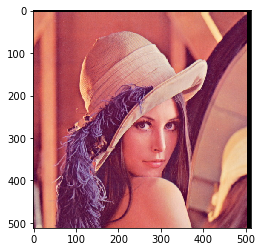

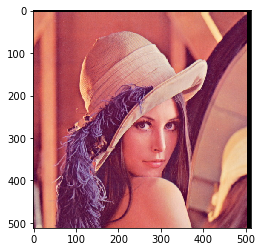

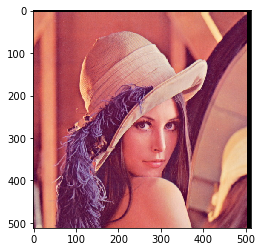

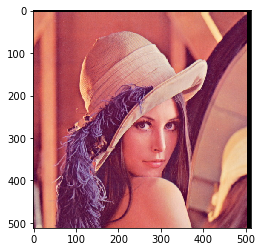

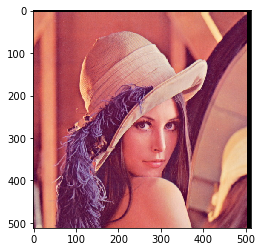

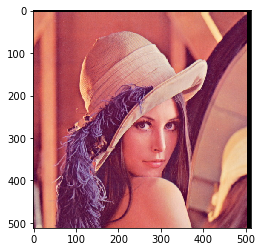

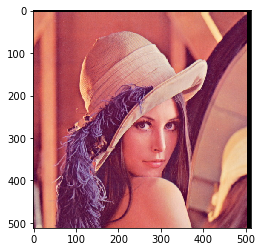

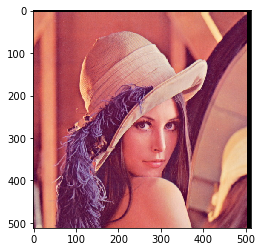

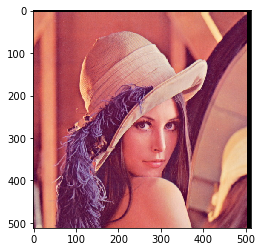

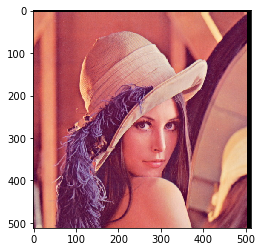

In [98]:
height, width = img.shape[:2]
from random import randint
dx = randint(-10,10)
dy = randint(-10,10)
M = np.float32([[1,0,dx],[0,1,dy]])

for i in range(10):
    dst = cv.warpAffine(img,M,(width,height),
                    borderValue =(0,0,0)) #borderValue는 이동한 이미지 공백 부분 어떻게 채워야 되는지
    imshow('',dst)    
    

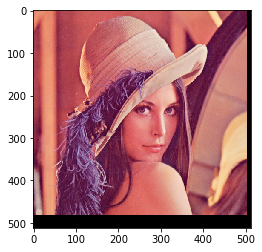

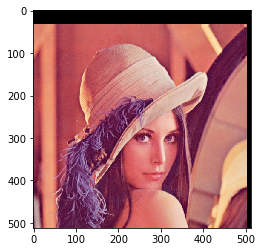

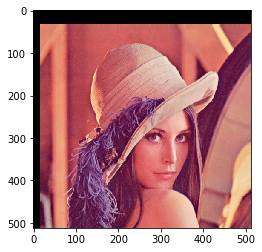

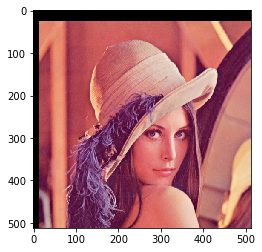

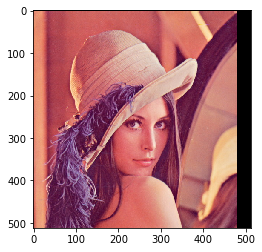

In [103]:
dx = 50
r = np.random.randint(dx*2,size=(5,2))-dx

M = np.float32([
    [1,0,0],
    [0,1,0]
])
c = img[0,0]

for p in r.tolist():
    M[:,2]=p
    dst = cv.warpAffine(img,M,(width,height),borderValue=(0,0,0))
    imshow('',dst)

**회전**

In [158]:
height, width = img. shape[:2]
img_center = (width/2,height/2)
img_corner = (512,0)
color = randint(0,255)
dx = 180
r = np.random.randint(dx*2)-dx
M = cv.getRotationMatrix2D(img_center,r,1.0) # 회전축, 육십분법 각도, 크기 정수배 값을 갖는 (2,2)는 스케일 최전에 관한 내용 2*3 행렬
print(M)
rotated_image = cv.warpAffine(img,M,(width,height),borderValue=(x,y,random_color))


# for p in r.tolist():
#     M[:,2]=p
#     dst = cv.warpAffine(img,M,(width,height),borderValue=(0,0,0))
#     imshow('',dst)


print(rotated_image.shape)

imshow('',rotated_image)

TypeError: cannot unpack non-iterable int object

**원근 이미지**

In [124]:
image = cv.imread('namecard.png')
height,width=image.shape[:2]
point_list = [[27,179],[611,36],[118,534],[754,325]]

pts1 = np.float32([list(point_list[0]),
                 list(point_list[1]),
                 list(point_list[2]),
                 list(point_list[3])])
pts1

array([[ 27., 179.],
       [611.,  36.],
       [118., 534.],
       [754., 325.]], dtype=float32)

In [126]:
pts2 = np.float32([[0,0],
                   [width,0],
                   [0,height],
                   [width,height]])
pts2

array([[  0.,   0.],
       [811.,   0.],
       [  0., 577.],
       [811., 577.]], dtype=float32)

[[ 1.22316837e+00 -3.13544568e-01  2.30989317e+01]
 [ 4.53502840e-01  1.85206754e+00 -3.43764667e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


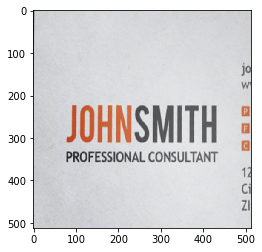

In [131]:
M = cv.getPerspectiveTransform(pts1,pts2)
print(M)
right_image = cv.warpPerspective(image,M,(width,height))
imshow('',right_image)

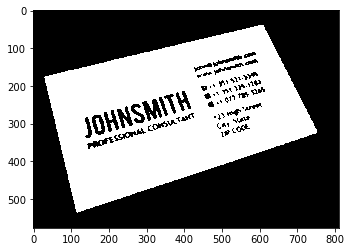

In [2]:
image = cv.imread('namecard.png')
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

_,gray2 = cv.threshold(gray,180,255,cv.THRESH_BINARY)

gray = cv.medianBlur(gray2, 5)
imshow('',gray)

In [3]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7, 7))
closed = cv.morphologyEx(gray, cv.MORPH_CLOSE, kernel)

cnts, z = cv.findContours(closed.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(cnts))

1


In [23]:
approx = cv.approxPolyDP(con, 0.02 * peri, True)
a=[]
for i in range(4):
    approxapprox[i][0]
    
    cv.drawContours(image,cnts,-1,(255,0,0),2)
    cv.circle(image,tuple(b),-1,(0,0,255),-1)
imshow('',image)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:1895: error: (-215:Assertion failed) radius >= 0 && thickness <= MAX_THICKNESS && 0 <= shift && shift <= XY_SHIFT in function 'cv::circle'


In [252]:
for i in range(4):
    approx=approx[i][0]

[609  39]
[ 30 178]
[116 535]
[753 323]


**interpolation algorithm**


확대 방법 
입력 값을 토대로 출력값도출이 아니라 출력쪽에서 입력반영
선형 보간법

확대시 스무딩 영상

Matrix
